## Final Project Submission

Please fill out:
* Student name: Flavian Miano
* Student pace: Full time
* Scheduled project review date/time: 19/11/2022
* Instructor name: Mark Tiba
* Blog post URL: 


# Data Science: Analysis of Movies released to help Microsoft new movie department

## Introduction

The movie industry is a very lucrative one. IMDB, Rotten Tommatoes, The Movie Database(TMDB) and BOM movies are some of the databases with the movies data. They contains a large number of public data on films such as the title of the film, the year of release of the film, the genre of the film, the audience, the rating of critics, the duration of the film, the summary of the film, actors, directors and much more. Faced with the large amount of data available on this sites. I will use them for this analysis.

## Project Overview

### Business Understanding




In [1]:
# Your code here - remember to use markdown cells for comments as well!
#Import requirements

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

In [2]:
#importing data
bom_movies = pd.read_csv('data/bom.movie_gross.csv')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movies = pd.read_csv('data/tn.movie_budgets.csv')
rt_movie = pd.read_table('data/rt.movie_info.tsv')
rt_reviews = pd.read_table('data/rt.reviews.tsv', encoding='windows-1254') #utf-64

In [3]:
#parsing through bom.movie_gross.csv
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
#Shape of bom_movies
bom_movies.shape

(3387, 5)

In [5]:
#info on bom_movies
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#null values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
#analyzing the null values
'''
Studio column has 5 missing values
domestic_gross column has 28 missing values
foreign_gross column has 1350 missing values
'''
#handling the missing values
'''
From the studio column it is best to drop since we cannot assume where the movie was produced
Domestic_gross column it is best to fill with the mean/mode
Dropping the foreign_gross column due to a lot of missing values
'''

'\nFrom the studio column it is best to drop since we cannot assume where the movie was produced\nDomestic_gross column it is best to fill with the mean/mode\nDropping the foreign_gross column due to a lot of missing values\n'

In [8]:
#dropping foreign_gross
#bom_movies.drop(['foreign_gross'], axis = 1, inplace = True) #Uncomment

In [9]:
#filling the domestic_gross column with mode
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].mode()[0], inplace = True)

In [10]:
#dropping the rows with missing values in the studio column
bom_movies.dropna(inplace = True)
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [11]:
#checking the new shape of the data
bom_movies.shape

(2033, 5)

In [12]:
#finding the number of movies per studio
num_of_movies = bom_movies['studio'].value_counts()
num_of_movies

Uni.            144
Fox             134
WB              130
Sony            106
BV              104
               ... 
Icar.             1
MPFT              1
KC                1
Libre             1
Darin Southa      1
Name: studio, Length: 175, dtype: int64

<AxesSubplot: >

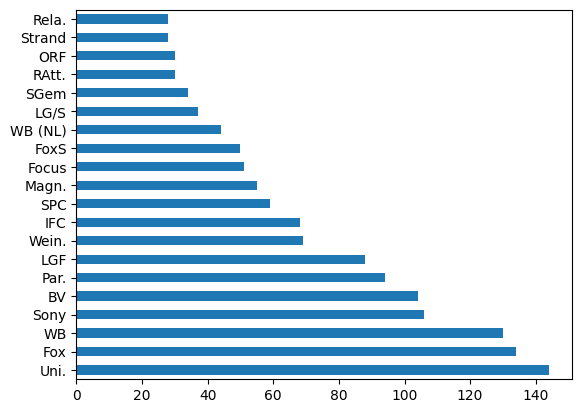

In [13]:
#Bar graph to show the studio with the most movies releases
bom_movies['studio'].value_counts()[:20].plot(kind='barh')

In [14]:
#the desription of the domestic_gross
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [15]:
bom_movies['domestic_gross'].value_counts()

1100000.0     37
1500000.0     14
1000000.0     13
1300000.0     12
2000000.0     10
              ..
36000.0        1
49100000.0     1
686000.0       1
70000000.0     1
93200.0        1
Name: domestic_gross, Length: 1295, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_13240\287522515.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  bom_movies['domestic_gross'][:20].plot(kind = 'barh')


<AxesSubplot: >

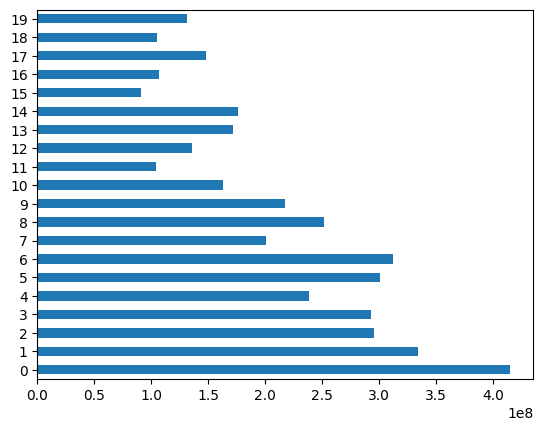

In [73]:
#graph to show the highest
bom_movies['domestic_gross'][:20].plot(kind = 'barh')

In [17]:
#parsing through tn.movie_budgets.tsv 
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [18]:
#info on tn_movies
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
#null values
tn_movies.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
#Analyzing the info`
'''no missing values in the tn.movie_budgets.csv'''

'no missing values in the tn.movie_budgets.csv'

In [21]:
#parsing through the tmdb.movies.csv file
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [22]:
#checking duplicates
tmdb_movies.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

In [23]:
#info on tmdb_movies
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [24]:
#null values
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [25]:
tmdb_movies['popularity'].describe()

count    26517.000000
mean         3.130912
std          4.355229
min          0.600000
25%          0.600000
50%          1.374000
75%          3.694000
max         80.773000
Name: popularity, dtype: float64

In [26]:
tmdb_movies['vote_count'].describe()

count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

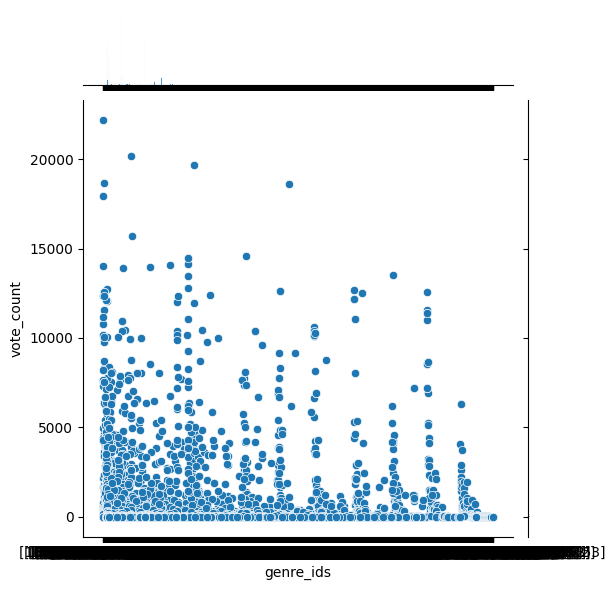

In [27]:
j1 = sns.jointplot(data=tmdb_movies, x='genre_ids', y='vote_count')

C:\Users\User\AppData\Local\Temp\ipykernel_13240\3087060311.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  plot = sns.catplot (data=tmdb_movies,


Text(0.5, 0.98, 'Genre of movies by popularity')

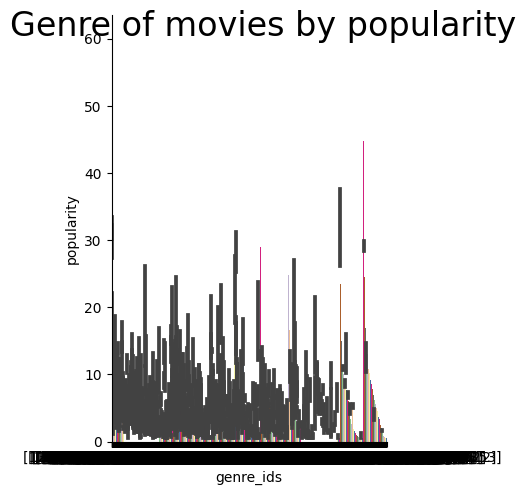

In [28]:
plot = sns.catplot (data=tmdb_movies,
             x="genre_ids",
             y="popularity",
             kind='bar',
             ci=50,
             palette="Accent", legend=False)

plot.fig.suptitle("Genre of movies by popularity",
                  fontsize=24, fontdict={"weight": "bold"})

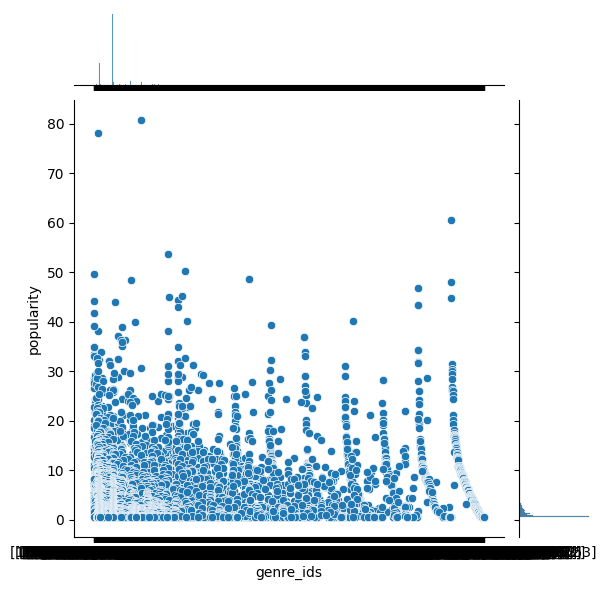

In [29]:
chart = sns.JointGrid(data=tmdb_movies, x='genre_ids', y='popularity')
chart.plot(sns.scatterplot, sns.histplot)

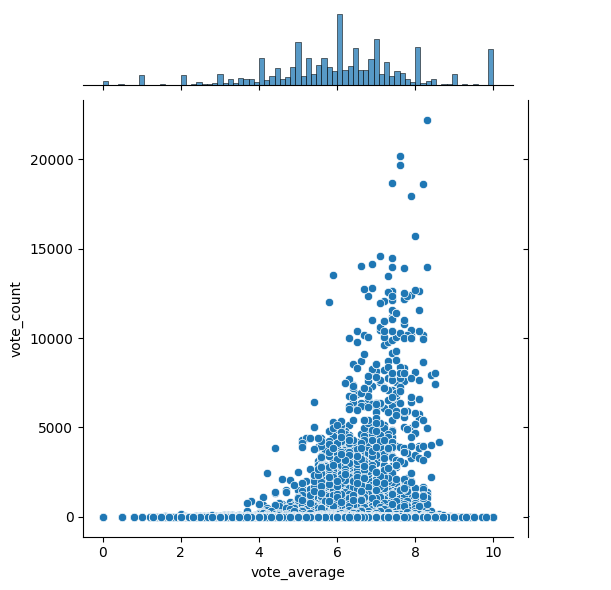

In [30]:
j1 = sns.jointplot(data=tmdb_movies, x='vote_average', y='vote_count')

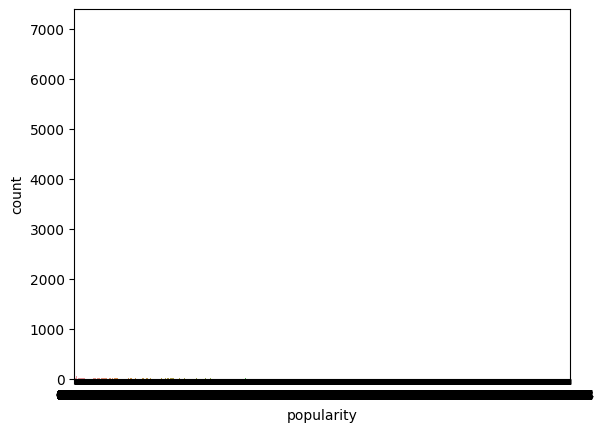

In [31]:
j1 = sns.countplot(data=tmdb_movies, x='popularity')

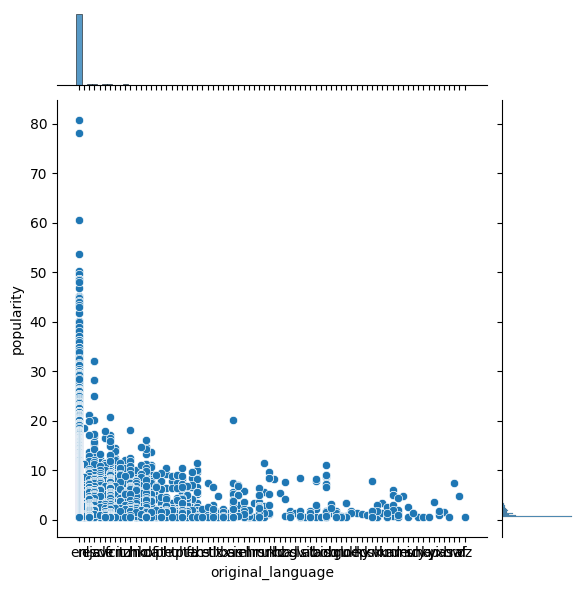

In [32]:
j1 = sns.jointplot(data=tmdb_movies, x='original_language', y='popularity')

<AxesSubplot: >

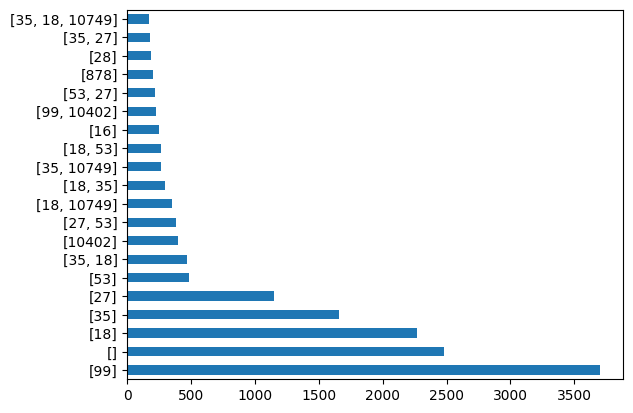

In [33]:
tmdb_movies['genre_ids'].value_counts()[:20].plot(kind='barh')

<AxesSubplot: >

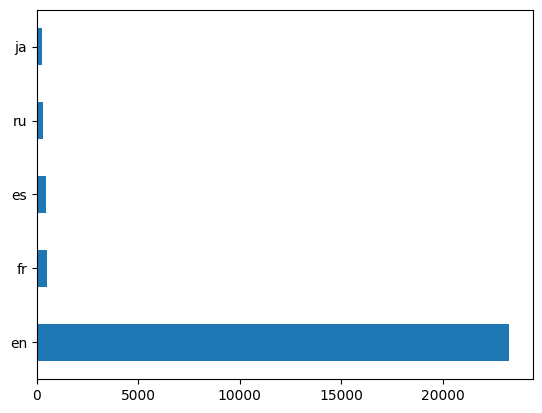

In [34]:
tmdb_movies['original_language'].value_counts()[:5].plot(kind='barh')

In [35]:
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [36]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
tn_movies.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
#Stripping $
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].astype(str)
tn_movies['production_budget'] = tn_movies['production_budget'].astype(str)
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [39]:
#removing the $ and , from the columns
tn_movies['production_budget'] = tn_movies['production_budget'].str.replace('$', '')
tn_movies['production_budget'] = tn_movies['production_budget'].str.replace(',', '')
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].str.replace('$', '')
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].str.replace(',', '')
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].str.replace('$', '')
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].str.replace(',', '')


#changing them to intergers
tn_movies['production_budget'] = tn_movies['production_budget'].astype('int')

tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].astype('int64')

tn_movies['domestic_gross'] = tn_movies['domestic_gross'].astype('int')

tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(2), object(2)
memory usage: 226.0+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_13240\2418052573.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['production_budget'] = tn_movies['production_budget'].str.replace('$', '')
C:\Users\User\AppData\Local\Temp\ipykernel_13240\2418052573.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].str.replace('$', '')
C:\Users\User\AppData\Local\Temp\ipykernel_13240\2418052573.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['domestic_gros

In [40]:
#calculating the profit
tn_movies['profit'] = tn_movies['worldwide_gross'] - tn_movies['production_budget']
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [41]:
#finding percentage profit
tn_movies['percentant_profit'] = tn_movies['profit'] / tn_movies['worldwide_gross']
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,percentant_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-inf
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,0.975051
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-2.736921
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-inf


C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
C:\Python310\lib\site-packa

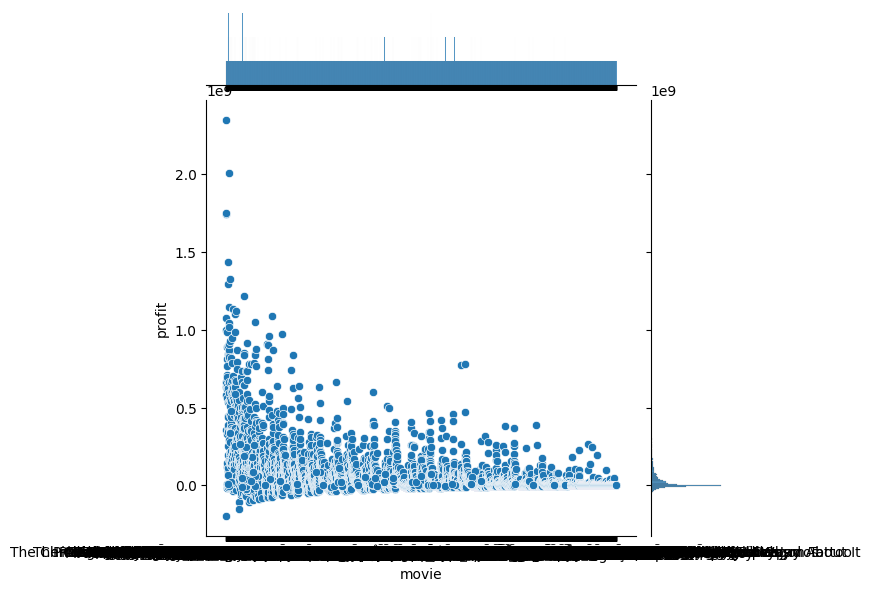

In [42]:
j1 = sns.jointplot(data=tn_movies, x='movie', y='profit');

In [43]:
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [44]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [45]:
rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [46]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [47]:
rt_reviews['rating'].isna().sum()

13517

In [48]:
conn = sqlite3.connect("data/im.db")
movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
;
""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [49]:
#finding the missing values
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [50]:
conn2 = sqlite3.connect("data/im.db")
movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
;
""", conn2)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [51]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [52]:
movie_basics.set_index('movie_id')

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [53]:
movie_ratings.set_index('movie_id')

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [54]:
#merging the movie_basics table and movie_ratings table
basics_ratings = pd.merge(movie_basics, movie_ratings, how='inner', sort=True)

In [55]:
basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [57]:
#finding null values
basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [58]:
basics_ratings.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [59]:
#checking duplicated data
basics_ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [60]:
basics_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


C:\Users\User\AppData\Local\Temp\ipykernel_13240\2571027594.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.scatterplot(data=basics_ratings, x="movie_id", y="averagerating", legend="full", palette="deep")


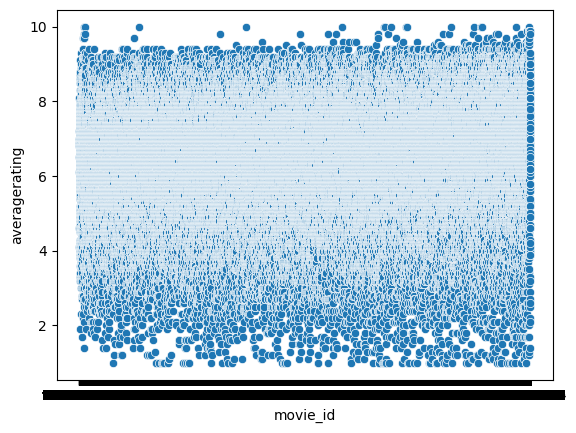

In [61]:
p = sns.scatterplot(data=basics_ratings, x="movie_id", y="averagerating", legend="full", palette="deep")

In [ ]:
df.plot.bar()
  
# plot between 2 attributes
plt.bar(basics_ratings[''], basics_ratings['runtime_minutes'])
plt.xlabel("Worldwide gross")
plt.ylabel("runtime minutes")
plt.show()

<AxesSubplot: >

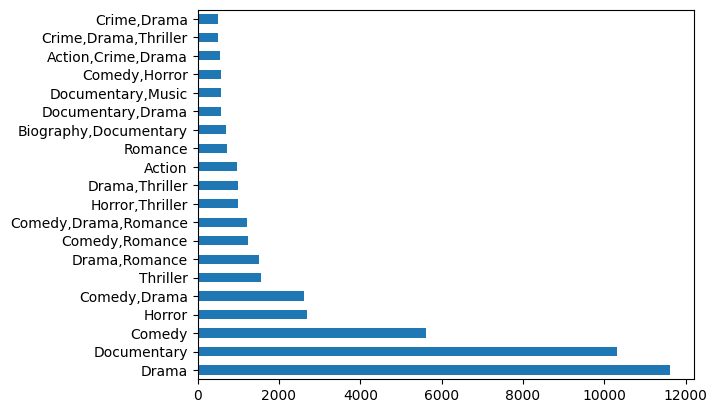

In [68]:
basics_ratings['genres'].value_counts()[:20].plot(kind = 'barh')

In [78]:
#joining the tmdb table with the basics_ratings table
genre_table = pd.merge(movie_basics, tmdb_movies, how='inner', sort=True, left_on = 'original_title', right_on = 'original_title')
genre_table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,NaN,Documentary,16037,[99],368247,en,0.840,2015-11-12,#ALLMYMOVIES,9.0,4
1,tt6856592,#Captured,#Captured,2017,81.0,Thriller,22151,[27],476424,en,1.418,2017-10-11,#Captured,3.2,6
2,tt5233106,#FollowFriday,#FollowFriday,2016,90.0,Thriller,18721,[53],416304,en,1.646,2016-07-01,#FollowFriday,3.2,7
3,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",14656,"[18, 9648, 27, 53]",301325,de,6.099,2015-11-20,#Horror,3.3,102
4,tt2538204,#Lucky Number,#Lucky Number,2015,80.0,Comedy,15941,[35],359732,en,0.919,2015-09-01,#Lucky Number,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,tt1545759,Point Blank,À bout portant,2010,81.0,"Action,Crime,Drama",2912,"[28, 53, 80]",61404,fr,6.021,2011-07-29,Point Blank,6.6,230
21074,tt1660302,Our Children,À perdre la raison,2012,111.0,Drama,8947,[18],121210,fr,1.972,2013-08-02,Our Children,6.8,33
21075,tt1391142,Among Us,Änglavakt,2010,94.0,Drama,4122,[18],42747,sv,0.840,2011-01-13,Among Us,6.2,3
21076,tt4291590,Evolution,Évolution,2015,81.0,"Drama,Mystery,Sci-Fi",14848,"[9648, 18, 27]",330770,fr,4.208,2015-09-14,Evolution,6.3,73


C:\Users\User\AppData\Local\Temp\ipykernel_13240\2698029549.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.scatterplot(data=genre_table, x="genres", y="popularity", legend="full", palette="deep")


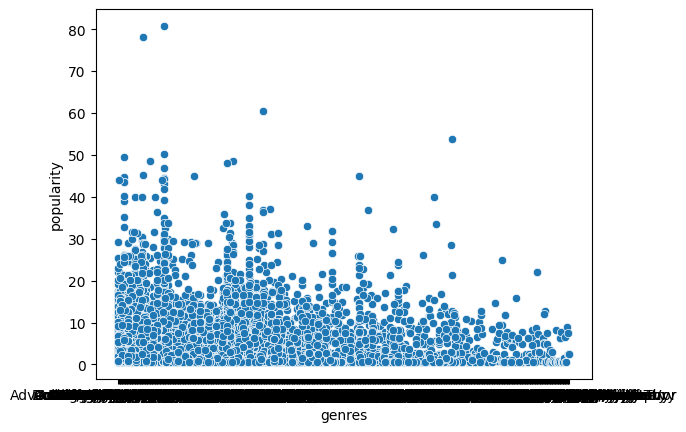

In [86]:
p = sns.scatterplot(data=genre_table, x="genres", y="popularity", legend="full", palette="deep")

C:\Users\User\AppData\Local\Temp\ipykernel_13240\2198162855.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.scatterplot(data=genre_table, x="release_date", y="popularity", legend="full", palette="deep")


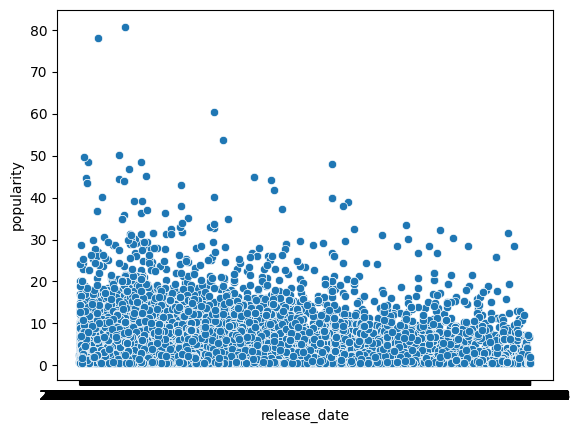

In [87]:
p = sns.scatterplot(data=genre_table, x="release_date", y="popularity", legend="full", palette="deep")